PUC Minas - Pontifícia Universidade Católica de Minas Gerais

Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

Tema:ANÁLISE DA RELAÇÃO DA IDADE DO PACIENTE E A PREVISÃO DE TEMPO DE PERMANÊNCIA DE INTERNAÇÃO DE PACIENTES DO SUS NO HOSPITAL EVANGÉLICO DE BELO HORIZONTE

Aluno: Renato Montuani Filho

Matrícula:1355660

Notebook referente aos códigos elaborados em Python na elaboração do Trabalho de Conclusão de Curso de Pòs-Graduaçãpo em Ciência de Dados e Big Data da PUC-Minas.


# 1 - COLETA, TRATAMENTO E PROCESSAMENTO DOS DADOS

In [274]:
# Versão do Python
import platform
print("Versão do Python")
print(platform.python_version())

Versão do Python
3.11.5


In [275]:
# Importação de bibliotecas para manipulação, tratamento e visualização de dados.

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [276]:
# Leitura do dataset "drg_internacao"

df_internacao = pd.read_csv("drg_internacao.csv")   

In [277]:
# Informações do dataframe

df_internacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               7252 non-null   int64  
 1   id_drg                           7252 non-null   int64  
 2   situacao                         7252 non-null   int64  
 3   carater_internacao               7252 non-null   int64  
 4   numero_operadora                 7252 non-null   object 
 5   numero_registro                  7250 non-null   float64
 6   numero_atendimento               7247 non-null   object 
 7   numero_autorizacao               1908 non-null   object 
 8   data_internacao                  7252 non-null   object 
 9   data_alta                        7252 non-null   object 
 10  condicao_alta                    7252 non-null   object 
 11  data_autorizacao                 6059 non-null   object 
 12  internado_outras_vez

In [278]:
df_internacao.head()

,id,id_drg,situacao,carater_internacao,numero_operadora,numero_registro,numero_atendimento,numero_autorizacao,data_internacao,data_alta,...,usuario_ultima_alteracao,correcao_registro,usuario_correcao,data_ultimo_recalculo,leito,condicao_adquirida_grave,registro_paciente_mae,mae_nao_identificada,estado,cidade
0,4,10407649,3,1,3945-SISTEMA ÚNICO DE SAÚDE,76189.0,419039,20231069424,2023-10-31 08:30:00-03,2023-11-01 10:07:00-03,...,Priscila.Marinho,,NaN,NaN,2 POSTO ENF 2105 ENF,NaN,0,,,NaN
1,5,10407547,3,1,3945-SISTEMA ÚNICO DE SAÚDE,75818.0,420489,20231069595,2023-10-31 13:23:00-03,2023-11-01 09:12:00-03,...,Priscila.Marinho,,NaN,NaN,1 POSTO ENF 1012 ENF,NaN,0,,,NaN
2,6,10407420,3,1,3945-SISTEMA ÚNICO DE SAÚDE,76171.0,418958,20231065413,2023-10-31 08:21:00-03,2023-11-01 09:18:00-03,...,Priscila.Marinho,,NaN,NaN,1 POSTO ENF 1013 ENF,NaN,0,,,NaN
3,7,10407057,3,1,3945-SISTEMA ÚNICO DE SAÚDE,41590.0,425845,20231052109,2023-11-01 09:22:00-03,2023-11-01 16:25:00-03,...,Priscila.Marinho,,NaN,NaN,4 POSTO ENF 4071 ENF,NaN,0,,,NaN
4,8,10406786,3,1,3945-SISTEMA ÚNICO DE SAÚDE,50154.0,424849,20231150295,2023-11-01 07:19:00-03,2023-11-01 16:00:00-03,...,Priscila.Marinho,,NaN,NaN,1 POSTO ENF 1014 ENF,NaN,0,,,NaN


In [279]:
# Selecionando as colunas desejadas

df_internacao = df_internacao [['id', 'id_drg', 'carater_internacao', 'data_internacao', 'data_alta', 'condicao_alta',
                               'permanencia_real', 'modalidade_internacao', 'permanencia_prevista_internacao']]

In [280]:
df_internacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               7252 non-null   int64  
 1   id_drg                           7252 non-null   int64  
 2   carater_internacao               7252 non-null   int64  
 3   data_internacao                  7252 non-null   object 
 4   data_alta                        7252 non-null   object 
 5   condicao_alta                    7252 non-null   object 
 6   permanencia_real                 7252 non-null   float64
 7   modalidade_internacao            7252 non-null   object 
 8   permanencia_prevista_internacao  7252 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 510.0+ KB


In [281]:
# Verificando se há dados nulos

df_internacao.isnull().sum()

id                                 0
id_drg                             0
carater_internacao                 0
data_internacao                    0
data_alta                          0
condicao_alta                      0
permanencia_real                   0
modalidade_internacao              0
permanencia_prevista_internacao    0
dtype: int64

In [282]:
# Leitura do dataset "drg_beneficiario"

df_beneficiario = pd.read_csv("drg_beneficiario.csv") 

In [283]:
# Informações do dataframe

df_beneficiario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               7252 non-null   int64 
 1   id_drg           7252 non-null   int64 
 2   codigo_paciente  7252 non-null   object
 3   plano            3603 non-null   object
 4   data_nascimento  7252 non-null   object
 5   sexo             7252 non-null   object
 6   recem_nascido    7252 non-null   object
 7   particular       7252 non-null   object
 8   idade_em_anos    7252 non-null   int64 
 9   idade_em_meses   7252 non-null   int64 
 10  idade_em_dias    7252 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 623.3+ KB


In [284]:
# Selecionando as colunas desejadas

df_beneficiario = df_beneficiario [['id', 'id_drg', 'data_nascimento', 'sexo', 'idade_em_anos']]

In [285]:
df_beneficiario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               7252 non-null   int64 
 1   id_drg           7252 non-null   int64 
 2   data_nascimento  7252 non-null   object
 3   sexo             7252 non-null   object
 4   idade_em_anos    7252 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 283.4+ KB


In [286]:
# Verificando se há dados nulos

df_beneficiario.isnull().sum()

id                 0
id_drg             0
data_nascimento    0
sexo               0
idade_em_anos      0
dtype: int64

# 2 - ANÁLISE E EXPLORAÇÃO DOS DADOS

In [287]:
#Resumo estatístico do dataset df_internacao
df_internacao.describe()

,id,id_drg,carater_internacao,permanencia_real,permanencia_prevista_internacao
count,7252.000000,7.252000e+03,7252.000000,7252.000000,7252.000000
mean,4985.800745,9.318643e+06,1.408715,4.372035,3.224766
std,3193.068030,8.459462e+05,0.491911,7.812617,4.184213
min,1.000000,7.862684e+06,1.000000,0.000000,0.300000
25%,2680.750000,8.651516e+06,1.000000,1.100000,1.000000
50%,4512.500000,9.177840e+06,1.000000,2.000000,1.900000
75%,6625.250000,1.011549e+07,2.000000,4.300000,3.700000
max,14803.000000,1.072855e+07,3.000000,184.500000,78.800000


In [288]:
#Resumo estatístico do dataset df_beneficiario
df_beneficiario.describe()

,id,id_drg,idade_em_anos
count,7252.000000,7.252000e+03,7252.000000
mean,5913.785025,9.318643e+06,55.608522
std,3482.394685,8.459462e+05,17.453674
min,1373.000000,7.862684e+06,14.000000
25%,3231.750000,8.651516e+06,43.000000
50%,5059.500000,9.177840e+06,57.000000
75%,7849.250000,1.011549e+07,68.000000
max,15135.000000,1.072855e+07,105.000000


In [289]:
#Resumo estatístico da variavel preditora (idade_em_anos)
df_beneficiario["idade_em_anos"].describe()

count    7252.000000
mean       55.608522
std        17.453674
min        14.000000
25%        43.000000
50%        57.000000
75%        68.000000
max       105.000000
Name: idade_em_anos, dtype: float64

<Axes: xlabel='idade_em_anos', ylabel='Count'>

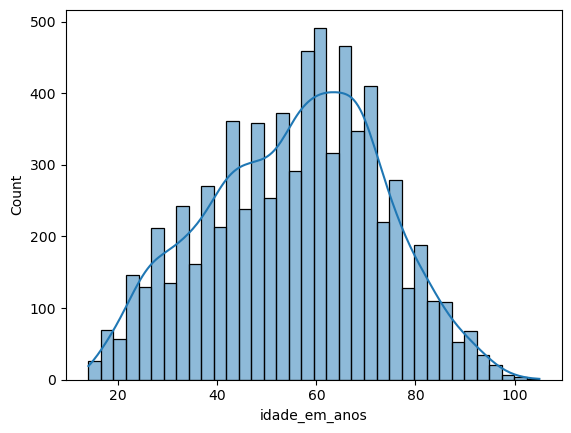

In [290]:
#Histograma da variavel preditora (idade_em_anos)
sns.histplot(data = df_beneficiario, x = "idade_em_anos", kde = True )

In [291]:
#Resumo estatístico da variavel alvo (permanencia_real)
df_internacao["permanencia_real"].describe()

count    7252.000000
mean        4.372035
std         7.812617
min         0.000000
25%         1.100000
50%         2.000000
75%         4.300000
max       184.500000
Name: permanencia_real, dtype: float64

In [292]:
#Preparando da variavel de alvo Y
y = df_internacao["permanencia_real"]

In [299]:
#Preparando da variavel preditora x
x = df_beneficiario["idade_em_anos"]

In [294]:
# import statsmodels.api as sm

In [295]:
#X = sm.add_constant(x)

In [296]:
# modelo = sm.OLS(y, x).fit()

In [297]:
# print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:       permanencia_real   R-squared (uncentered):                   0.212
Model:                            OLS   Adj. R-squared (uncentered):              0.212
Method:                 Least Squares   F-statistic:                              1956.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                        0.00
Time:                        10:22:29   Log-Likelihood:                         -25320.
No. Observations:                7252   AIC:                                  5.064e+04
Df Residuals:                    7251   BIC:                                  5.065e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [300]:
#Verificando a correlação entre as variáveis

internacao = np.corrcoef(x,y)[0,1]
print(internacao)

-0.019383889015926917


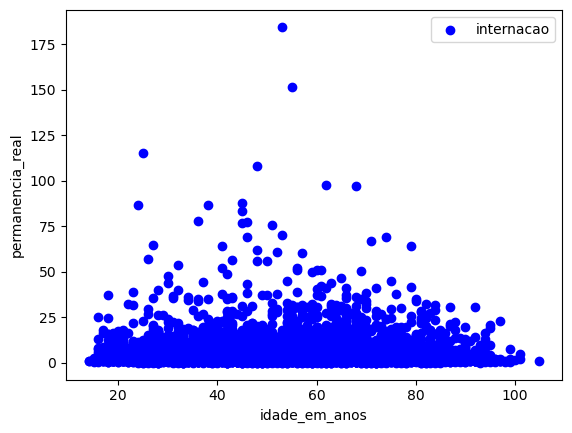

In [301]:
# Gráfico de dispersão entre x e y
plt.scatter(x, y, color = "blue", label = "internacao")
plt.xlabel("idade_em_anos")
plt.ylabel("permanencia_real")
plt.legend()
plt.show()

# 3 - CRIAÇÃO DO MODELO DE MACHINE LEARNING

In [302]:
# Importação de bibliotecas para análise de dados e crianção do modelo preditivo.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [303]:
# Preparando a variável de entrada X
X = np.array(df_beneficiario["idade_em_anos"])

In [304]:
# Ajustando o shape de X
X = X.reshape(-1, 1)

In [319]:
# Dividindo dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [320]:
X_treino.shape

(5801, 1)

In [321]:
X_teste.shape

(1451, 1)

In [322]:
y_treino.shape

(5801,)

In [323]:
y_teste.shape

(1451,)

In [324]:
# Criando o modelo de regressão linear simples
modelo = LinearRegression()

In [325]:
# Treinando o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

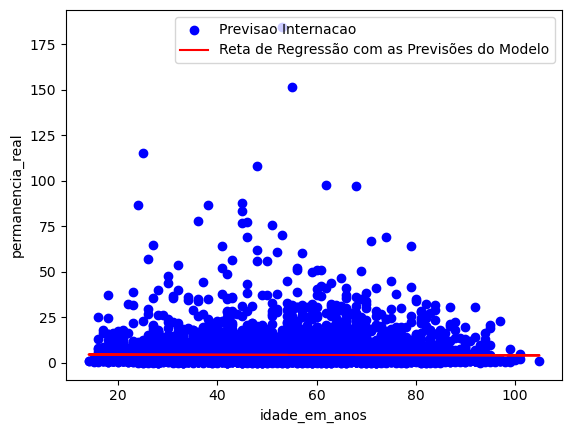

In [332]:
# Visualizando a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Previsao Internacao")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("idade_em_anos")
plt.ylabel("permanencia_real")
plt.legend()
plt.show()

# 4 - AVALIANDO O DESEMPENHO DO MODELO

In [326]:
# Bilioteca para avaliar o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [327]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.00


In [328]:
predictions = modelo.predict(X_teste)

In [329]:
# Intercepto - parâmetro w0
modelo.intercept_

4.61396743472202

In [330]:
# Slope - parâmetro w1
modelo.coef_

array([-0.00523478])

In [331]:
mae = mean_absolute_error(y_teste, predictions)
mse = mean_squared_error(y_teste, predictions)
r2 = r2_score(y_teste, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


MAE: 4.24834215919532
MSE: 85.63519444537854
R^2: 2.971462321355034e-05
